In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf
%matplotlib inline


In [110]:
df2021 = pd.read_csv('2021.csv')
df2021.columns = [c.replace(' ','_') for c in df2021.columns] 
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country_name                                149 non-null    object 
 1   Regional_indicator                          149 non-null    object 
 2   Ladder_score                                149 non-null    float64
 3   Standard_error_of_ladder_score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged_GDP_per_capita                       149 non-null    float64
 7   Social_support                              149 non-null    float64
 8   Healthy_life_expectancy                     149 non-null    float64
 9   Freedom_to_make_life_choices                149 non-null    float64
 10  Generosity    

In [111]:
# renaming columns for convenience 
df2021 = df2021.rename(columns={'Regional_indicator':'Region',
                                'Country_name':'Country',
                                'Ladder_score':'Happiness_Score',
                                'Explained_by:_Log_GDP_per_capita':'Effect_Economy',
                                'Explained_by:_Healthy_life_expectancy':'Effect_Health',
                                'Explained_by:_Perceptions_of_corruption':'Effect_Trust',
                                'Explained_by:_Social_support':'Effect_Family'})

In [112]:
# dropping unused columns and columns with no values
df2021 = df2021.drop(columns =['upperwhisker','lowerwhisker','Standard_error_of_ladder_score'])
df2021 = df2021.drop(df2021.index[df2021['Country'] == 'Afghanistan'], inplace=False)

df2021 = df2021.dropna()


<AxesSubplot:>

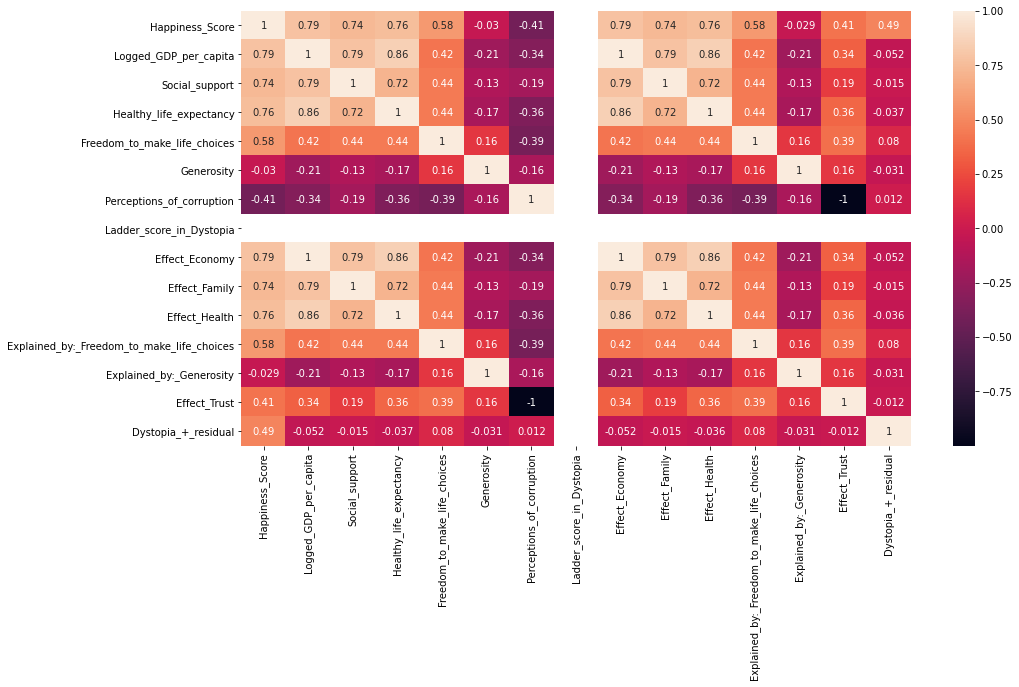

In [113]:
# heatmap of factors affecting happiness score
corr = df2021.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot = True)

In [114]:
# Sorted correlations descending
corr['Happiness_Score'].sort_values(ascending=False)

Happiness_Score                               1.000000
Logged_GDP_per_capita                         0.788414
Effect_Economy                                0.788390
Effect_Health                                 0.762190
Healthy_life_expectancy                       0.762168
Social_support                                0.742009
Effect_Family                                 0.741978
Explained_by:_Freedom_to_make_life_choices    0.580257
Freedom_to_make_life_choices                  0.580227
Dystopia_+_residual                           0.487843
Effect_Trust                                  0.413174
Explained_by:_Generosity                     -0.029330
Generosity                                   -0.029627
Perceptions_of_corruption                    -0.413067
Ladder_score_in_Dystopia                           NaN
Name: Happiness_Score, dtype: float64

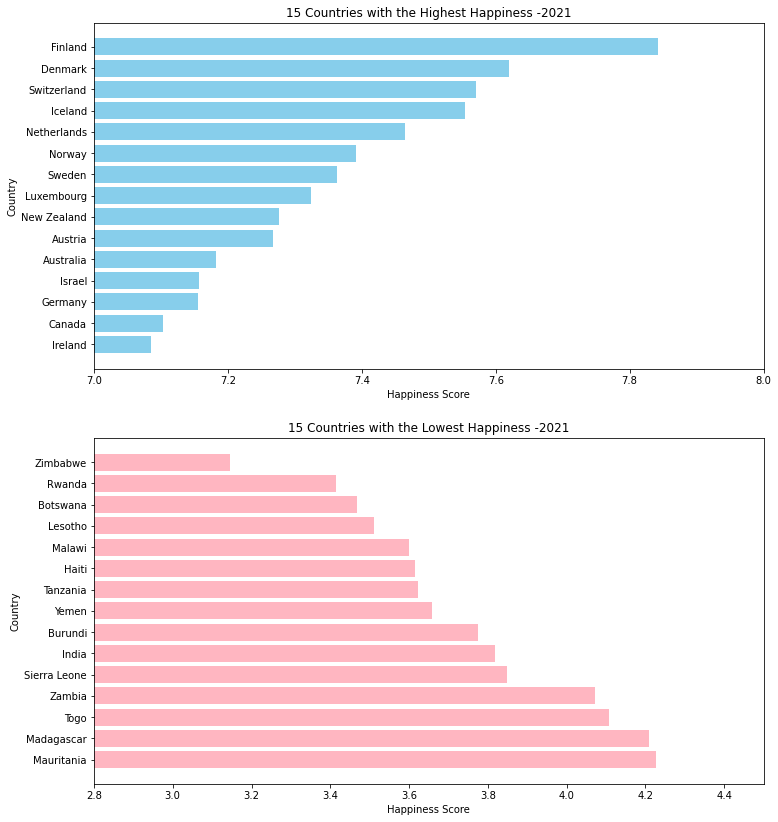

In [115]:
plt.subplots(2,1,figsize=(12,14))
plt.subplot(211)
x = df2021.sort_values('Happiness_Score', ascending=True).tail(15)
plt.barh(y='Country', width='Happiness_Score', data=x, color='skyblue')
plt.xlim(xmin=7.0, xmax=8)
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('15 Countries with the Highest Happiness -2021')
plt.subplot(212)
x = df2021.sort_values('Happiness_Score', ascending=False).tail(15)
plt.barh(y='Country', width='Happiness_Score', data=x, color='lightpink')
plt.xlim(xmin=2.8, xmax=4.5)
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('15 Countries with the Lowest Happiness -2021')
plt.show()

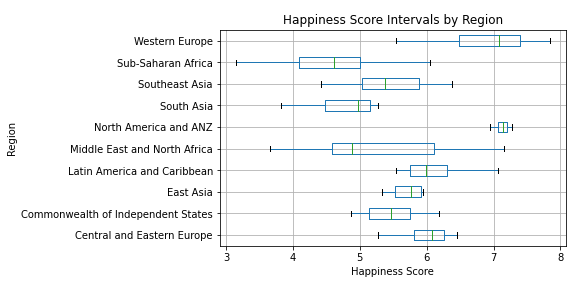

In [70]:
# boxplot Happiness Score against Region
ax=df2021.boxplot(column='Happiness_Score',by='Region',vert=False, showfliers=False)
plt.suptitle(' ')
ax.set_xlabel('Happiness Score')
ax.set_ylabel('Region')
plt.title('Happiness Score Intervals by Region')
plt.show()

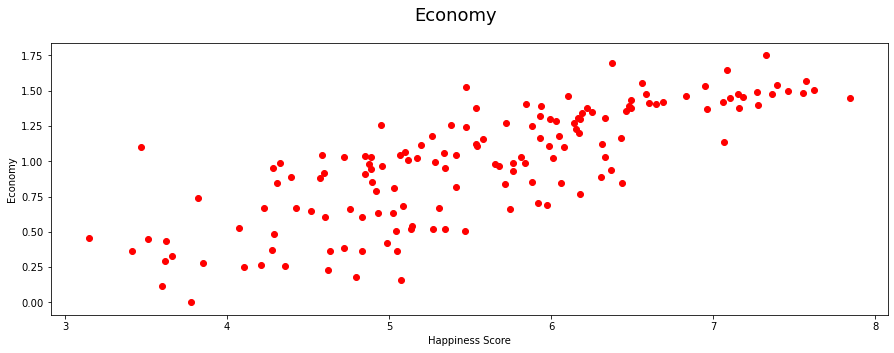

In [138]:
plt.figure(figsize=(15,5)); 
    
plt.scatter(df2021['Happiness_Score'], df2021['Effect_Economy'], color='red');
plt.xlabel("Happiness Score");
plt.ylabel("Economy");
plt.suptitle("Economy",fontsize=18)
plt.show()


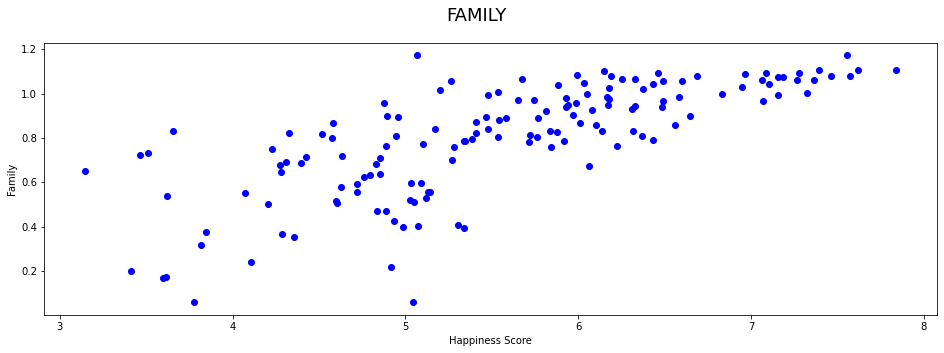

In [140]:
plt.figure(figsize=(16,5));
plt.scatter(df2021['Happiness_Score'], df2021['Effect_Family'], color='b');
plt.xlabel("Happiness Score");
plt.ylabel("Family");
plt.suptitle("FAMILY",fontsize=18)
plt.show()


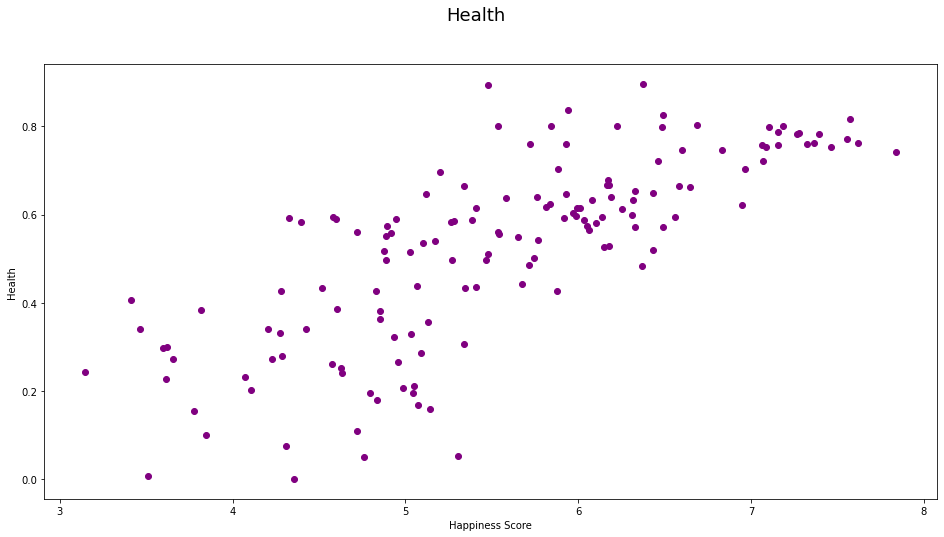

In [144]:
plt.figure(figsize=(16,8));
plt.scatter(df2021['Happiness_Score'], df2021['Effect_Health'], color='purple');
plt.xlabel("Happiness Score");
plt.ylabel("Health");
plt.suptitle("Health",fontsize=18)
plt.show()

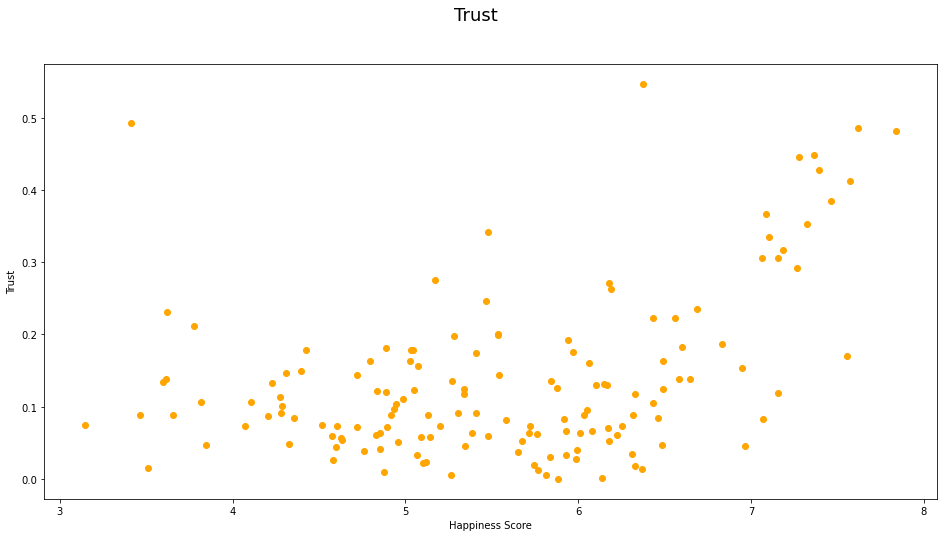

In [145]:
plt.figure(figsize=(16,8));
plt.scatter(df2021['Happiness_Score'], df2021['Effect_Trust'], color='orange');
plt.xlabel("Happiness Score");
plt.ylabel("Trust");
plt.suptitle("Trust",fontsize=18)

plt.show()

In [76]:
result_1 = smf.ols(formula="Happiness_Score ~ Effect_Economy", data=df2021).fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     239.8
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           1.30e-32
Time:                        21:14:08   Log-Likelihood:                -144.59
No. Observations:                 148   AIC:                             293.2
Df Residuals:                     146   BIC:                             299.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.5406      0.140     25.212      0.000       3.263       3.818
Effect_Economy     2.0510      0.132     15.485      0.000       1.789       2.313
==============================================================================
Omnibus:                        3.008   Durbin-Watson:                   1.289
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                2.729
Skew:                          -0.331   Prob(JB):                        0.255
Kurtosis:                       3.059   Cond. No.                         5.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
result_2 = smf.ols(formula="Happiness_Score ~ Effect_Family", data=df2021).fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     178.8
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           3.92e-27
Time:                        21:14:08   Log-Likelihood:                -157.32
No. Observations:                 148   AIC:                             318.6
Df Residuals:                     146   BIC:                             324.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.0811      0.194     15.903      0.000       2.698       3.464
Effect_Family     3.0952      0.231     13.373      0.000       2.638       3.553
==============================================================================
Omnibus:                        5.510   Durbin-Watson:                   1.083
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.071
Skew:                          -0.434   Prob(JB):                       0.0792
Kurtosis:                       3.263   Cond. No.                         6.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
result_3 = smf.ols(formula="Happiness_Score ~ Effect_Health", data=df2021).fit()
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     202.4
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           2.30e-29
Time:                        21:14:09   Log-Likelihood:                -152.13
No. Observations:                 148   AIC:                             308.3
Df Residuals:                     146   BIC:                             314.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.5754      0.150     23.858      0.000       3.279       3.872
Effect_Health     3.7828      0.266     14.226      0.000       3.257       4.308
==============================================================================
Omnibus:                        4.735   Durbin-Watson:                   1.200
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.868
Skew:                          -0.292   Prob(JB):                        0.145
Kurtosis:                       2.465   Cond. No.                         6.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
result_3 = smf.ols(formula="Happiness_Score ~ Effect_Trust", data=df2021).fit()
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     30.05
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           1.80e-07
Time:                        21:14:10   Log-Likelihood:                -202.64
No. Observations:                 148   AIC:                             409.3
Df Residuals:                     146   BIC:                             415.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.0377      0.123     41.078      0.000       4.795       5.280
Effect_Trust     3.7903      0.691      5.482      0.000       2.424       5.157
==============================================================================
Omnibus:                        9.474   Durbin-Watson:                   0.220
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.553
Skew:                          -0.610   Prob(JB):                      0.00842
Kurtosis:                       3.246   Cond. No.                         8.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
region_colors = {'Middle East and North Africa':'turquoise',
                 'Latin America and Caribbean':'coral',
                 'East Asia':'darkmagenta',
                 'Sub-Saharan Africa':'springgreen',
                 'Southeast Asia':'mediumseagreen',
                 'Western Europe':'pink',
                 'North America and ANZ':'yellow',
                 'Commonwealth of Independent States':'pink',
                 'Central and Eastern Europe':'darkcyan',
                 'South Asia':'fuchsia'};


type(region_colors)
colors = []
for i in df2021['Region']:
    
    colors.append(region_colors[i])

<Figure size 432x288 with 0 Axes>

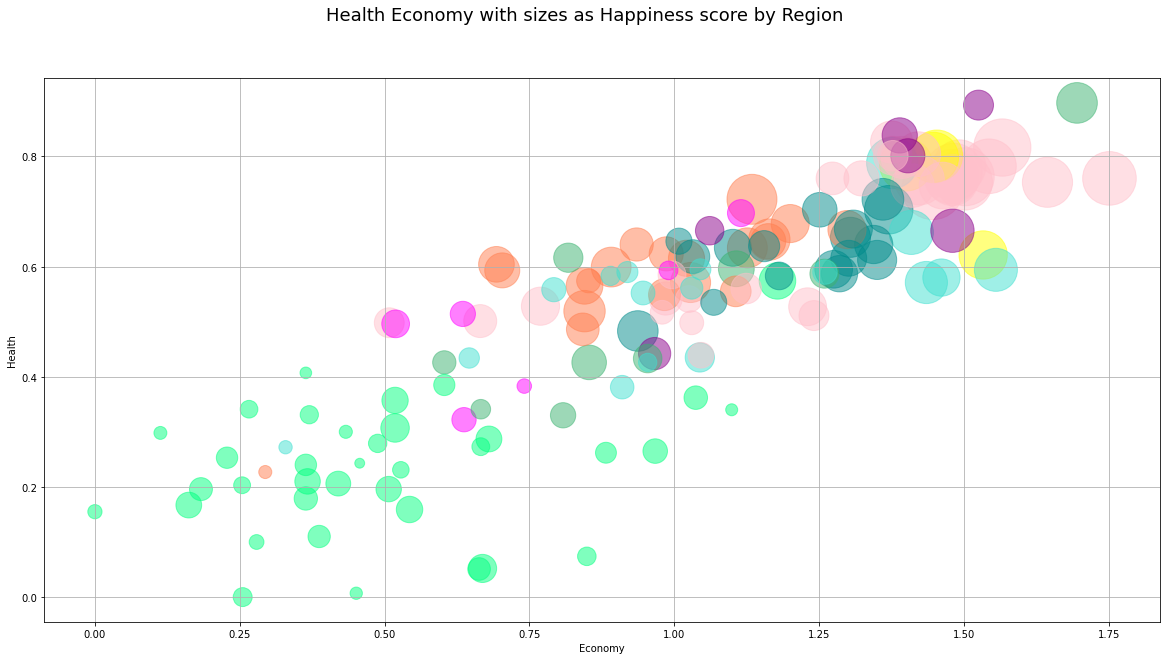

In [102]:
plt.clf()
plt.figure(figsize=(20,10))
plt.scatter(df2021['Effect_Economy'], df2021['Effect_Health'], s=(df2021['Happiness_Score']**4), alpha=0.5, c=colors)
plt.grid(True)

plt.xlabel("Economy")
plt.ylabel("Health")

plt.suptitle("Health Economy with sizes as Happiness score by Region", fontsize=18)

plt.show()

Text(0.5, 0.98, 'Economy and Happiness by Region')

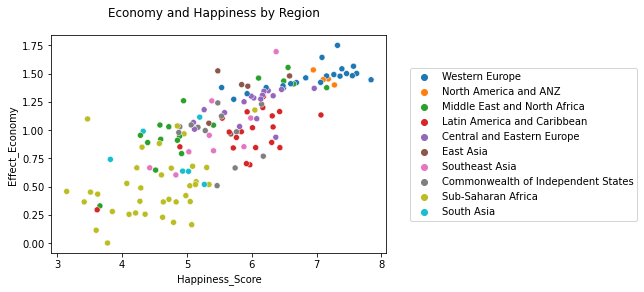

In [90]:
sns.scatterplot(data=df2021,x='Happiness_Score',y='Effect_Economy',hue='Region')
plt.legend(bbox_to_anchor=(1.75, 0.5), loc='center right', borderaxespad=0)
plt.suptitle('Economy and Happiness by Region')

Text(0.5, 0.98, 'Health and Happiness by Region')

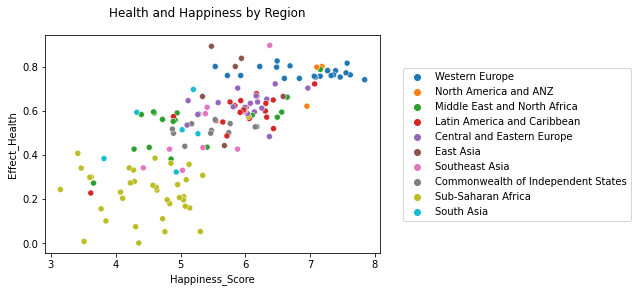

In [91]:
sns.scatterplot(data=df2021,x='Happiness_Score',y='Effect_Health',hue='Region')
plt.legend(bbox_to_anchor=(1.75, 0.5), loc='center right', borderaxespad=0)
plt.suptitle('Health and Happiness by Region')


Text(0.5, 0.98, 'Family and Happiness by Region')

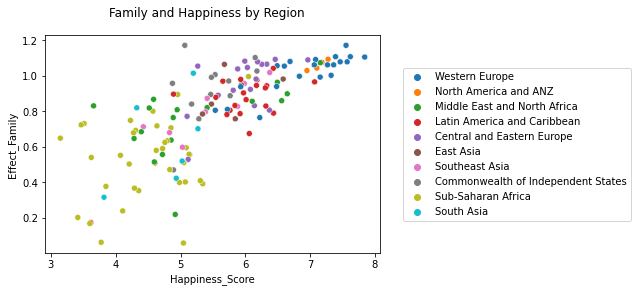

In [123]:
sns.scatterplot(data=df2021,x='Happiness_Score',y='Effect_Family',hue='Region')
plt.legend(bbox_to_anchor=(1.75, 0.5), loc='center right', borderaxespad=0)
plt.suptitle('Family and Happiness by Region')


Text(0.5, 0.98, 'Trust and Happiness by Region')

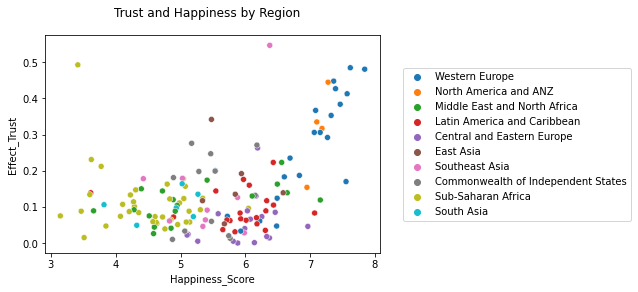

In [124]:
sns.scatterplot(data=df2021,x='Happiness_Score',y='Effect_Trust',hue='Region')
plt.legend(bbox_to_anchor=(1.75, 0.5), loc='center right', borderaxespad=0)
plt.suptitle('Trust and Happiness by Region')
